In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Reading the excel datasheet using pandas library

In [3]:
df=pd.read_excel(r"C:\Users\anush\Downloads\Unemployment in India (1).xlsx")

## Displaying the data in the form of a DataFrame

In [4]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


## Checking info about our dataframe

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [7]:
sns.set_style('darkgrid')

# Employed data analysis

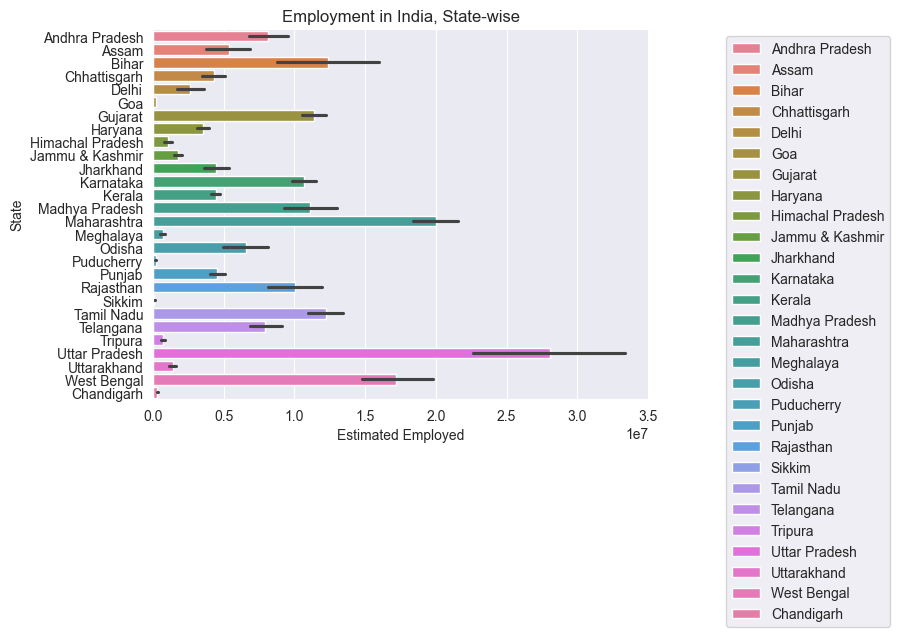

In [10]:
plt.title("Employment in India, State-wise")
sns.barplot(x='Estimated Employed',y='Region',hue='Region',data=df)
plt.ylabel('State')
plt.legend(loc="upper right",bbox_to_anchor=(1.5,1))

<Axes: title={'center': 'Employment in India ,Region-wise'}, xlabel='Estimated Employed', ylabel='Count'>

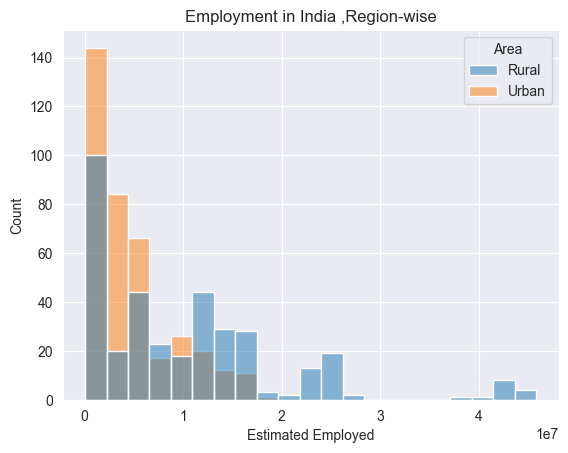

In [11]:
plt.title("Employment in India ,Region-wise")
sns.histplot(x='Estimated Employed',hue='Area',data=df) 

# Unemployment data analysis

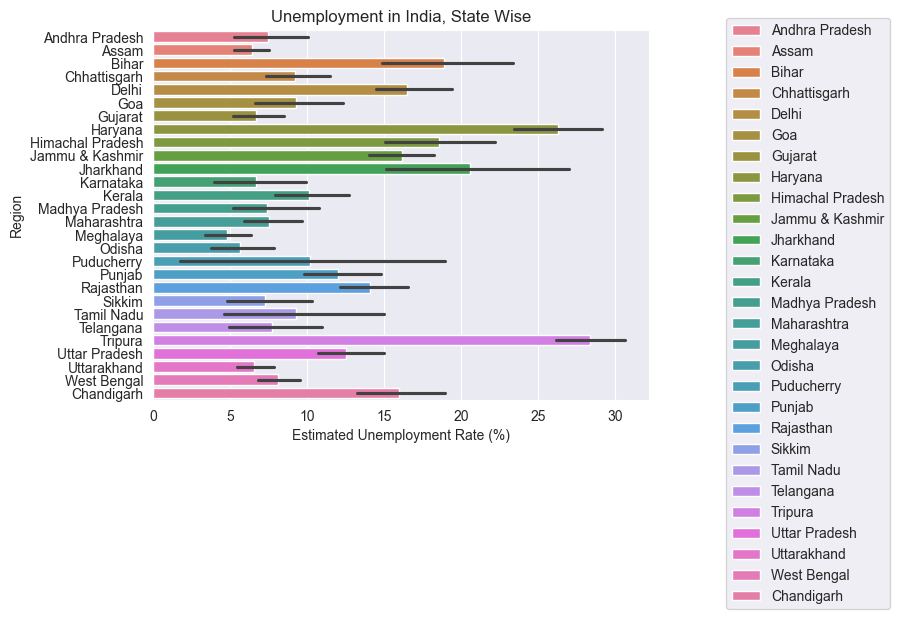

In [13]:
plt.title('Unemployment in India, State Wise')
sns.barplot(x='Estimated Unemployment Rate (%)',y='Region',hue='Region',data=df)
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.05))

<Axes: title={'center': 'Unemployment in India ,Region-wise'}, xlabel='Estimated Unemployment Rate (%)', ylabel='Count'>

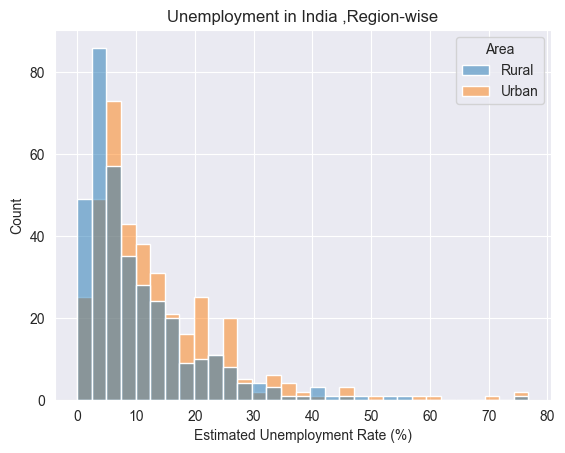

In [14]:
plt.title("Unemployment in India ,Region-wise")
sns.histplot(x='Estimated Unemployment Rate (%)',hue='Area',data=df) 

# Analysing unemployment rate in India per state

In [42]:
df = df.map(lambda x: x if x else "null")  
fig = px.icicle(
            df,
            path=df.columns,
        )
figure_data = fig["data"][0]

mask = np.char.find(figure_data.ids.astype(str), "null") == -1
figure_data.ids = figure_data.ids[mask]
figure_data.values = figure_data.values[mask]
figure_data.labels = figure_data.labels[mask]
figure_data.parents = figure_data.parents[mask]

ValueError: ('Non-leaves rows are not permitted in the dataframe \n', Region                                     
Date                                       
Frequency                                  
Estimated Unemployment Rate (%)            
Estimated Employed                         
Estimated Labour Participation Rate (%)    
Area                                       
Name: 359, dtype: object, 'is not a leaf.')

In [38]:
data=df[["Region","Area","Estimated Unemployment Rate (%)"]]
figure=px.sunburst(data,path=["Area","Region"],values="Estimated Unemployment Rate (%)",title="Unemployment Rate in India",width=1000,height=1000)
figure.show()

ValueError: ('Non-leaves rows are not permitted in the dataframe \n', Area      
Region    
Name: 359, dtype: object, 'is not a leaf.')

## Analysing unemployment rate as per date

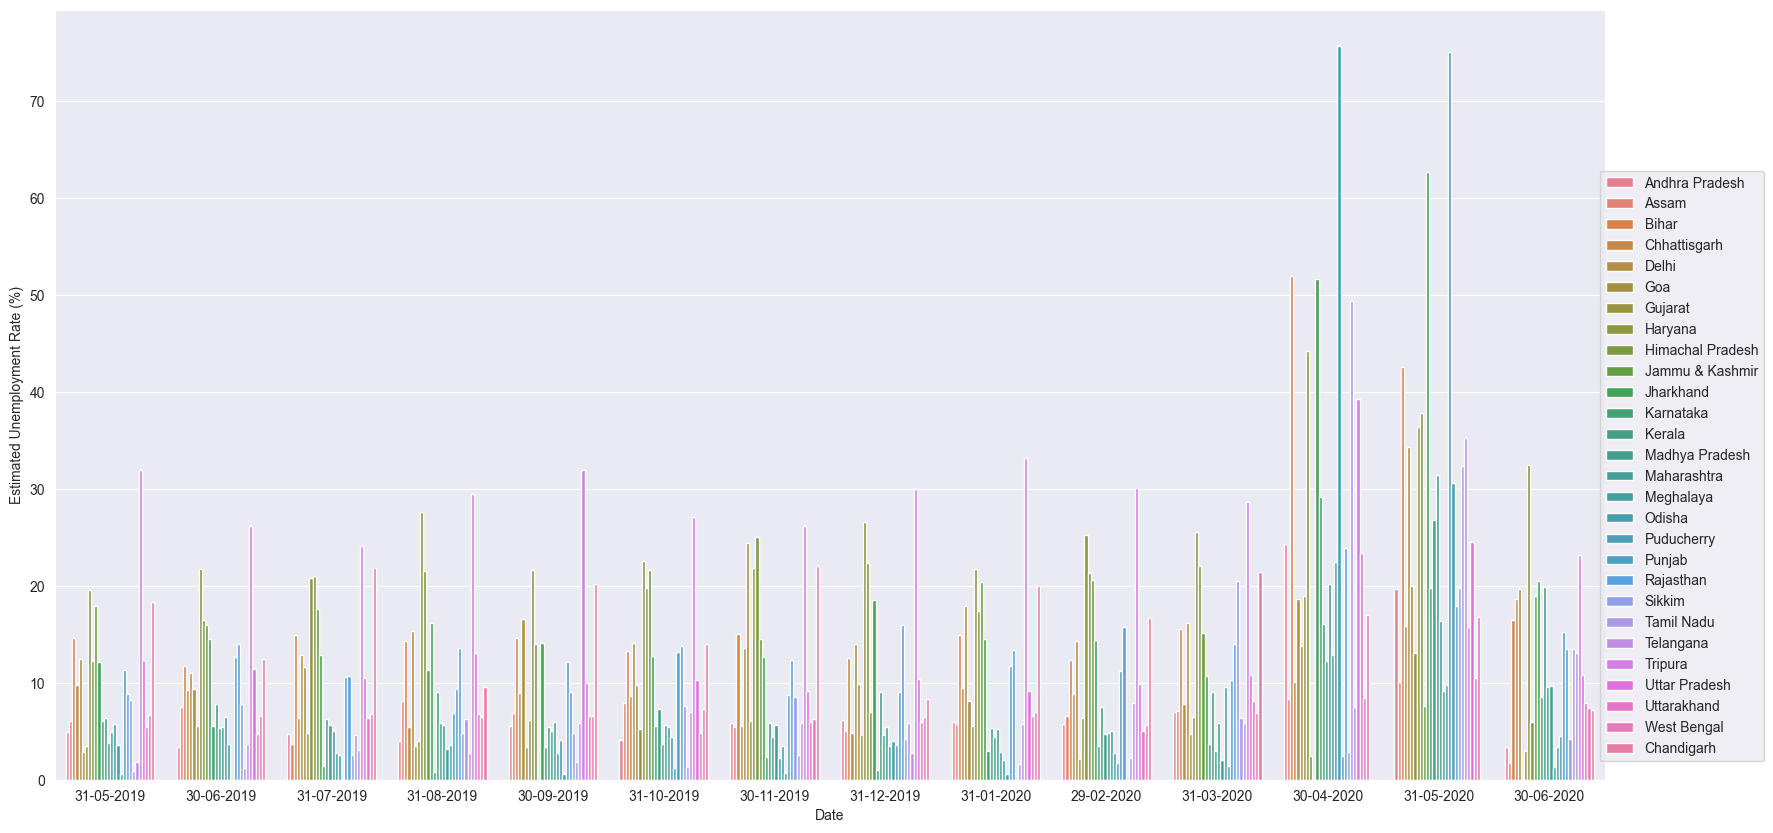

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(y='Estimated Unemployment Rate (%)',x='Date',hue="Region",data=df,errorbar=None)
plt.legend(loc="upper right",bbox_to_anchor=(1.107,0.8))

## Analysis of Labour Participation Rate

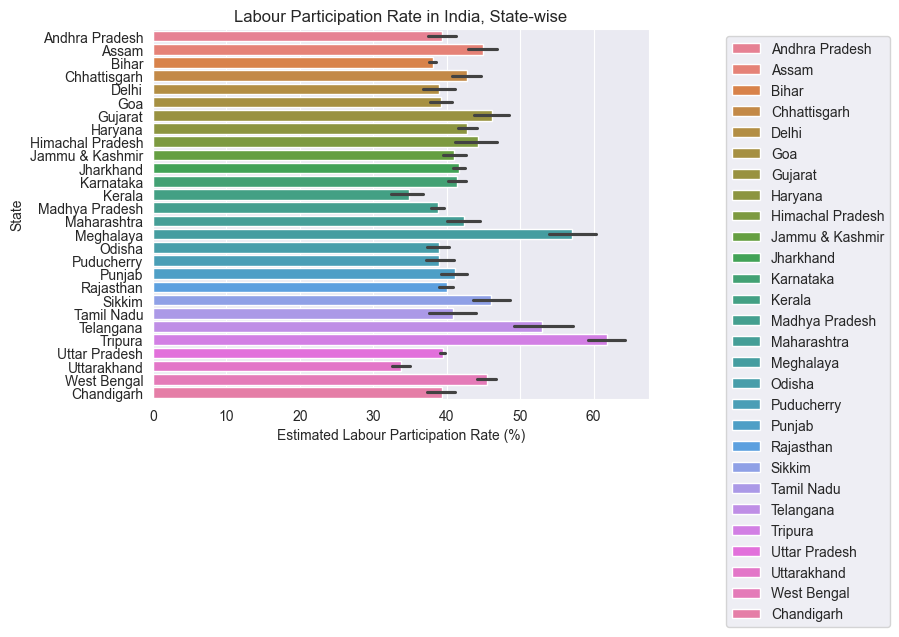

In [23]:
plt.title("Labour Participation Rate in India, State-wise")
sns.barplot(x='Estimated Labour Participation Rate (%)',y='Region',data=df,hue='Region',legend=True)
plt.ylabel('State')
plt.legend(loc="upper right",bbox_to_anchor=(1.5,1))

<Axes: title={'center': 'Labour Participation Rate in India ,Region-wise'}, xlabel='Estimated Labour Participation Rate (%)', ylabel='Count'>

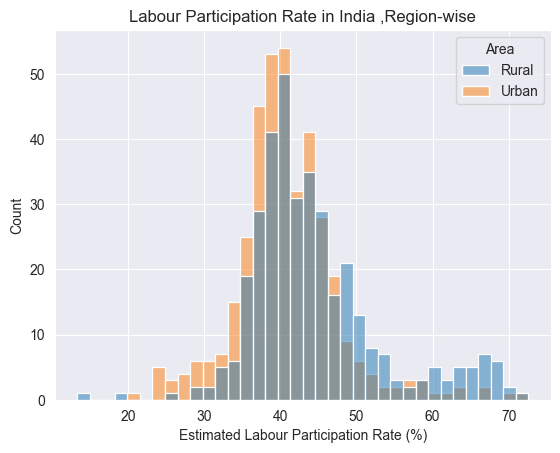

In [25]:
plt.title("Labour Participation Rate in India ,Region-wise")
sns.histplot(x='Estimated Labour Participation Rate (%)',hue='Area',data=df)

## Done, that's all we have done all the important analysis